# Limpeza dos Dados  
Esse notebook vai se fazer a limpeza e ajuste dos dados e análise preliminar

### Importando as Bibliotecas

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Conhecendo o Dataset

In [33]:
dados_clinicos = pd.read_excel('./dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')
dados_clinicos.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [34]:
dados_clinicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


O dataset possui 1925 registros e 231 colunas, sendo 225 float, 4 inteiros 2 e 2 string.  
vamos analizar as features mais para frente

#### Dados Faltantes

In [35]:
#Verificando se existem colunsa com dados faltantes.
colunas_faltantes = (dados_clinicos.isnull().sum())
colunas_faltantes[colunas_faltantes > 0]

DISEASE GROUPING 1                   5
DISEASE GROUPING 2                   5
DISEASE GROUPING 3                   5
DISEASE GROUPING 4                   5
DISEASE GROUPING 5                   5
                                  ... 
BLOODPRESSURE_SISTOLIC_DIFF_REL    685
HEART_RATE_DIFF_REL                685
RESPIRATORY_RATE_DIFF_REL          748
TEMPERATURE_DIFF_REL               694
OXYGEN_SATURATION_DIFF_REL         686
Length: 225, dtype: int64

O dataset possui possui um número relevante de lacunas, que precisamos tratar antes de realizar a análise. Vamos abordar esse ponto logo adiante.

#### Verificando as os Dados  
Segundo o time de dados do hospital Sírio Libanês, as colunas (features) estão dividas da seguinte forma:
* Informação demográfica do paciente (03)
* Grupo de doenças pré existentes no paciente (09)
* Resultado do exame de sangue (36)
* Sinais vitais (06)

Além dessas 54 features, ainda existem as colunas que vieram através da feature engeneering do próprio time de dados do hospital, como a diferença absoluta e relativa entre as colunas originais.

In [36]:
#Dados demográficos
dados_clinicos.iloc[:, 1:4].head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER
0,1,60th,0
1,1,60th,0
2,1,60th,0
3,1,60th,0
4,1,60th,0


In [37]:
#Dados das doenças pré existentes
dados_clinicos.iloc[:, 4:13].head()

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [38]:
dados_clinicos.iloc[:, 4:13].describe()

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896
std,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


o grupo de doenças possuem valores booleanos mas está no formato float - vamos realizar a conversão assim que os dados nulos forem tratados.

#### Verificando quantidade de pacientes  
Uma primeira olhada no dataset e estudando um lendo um pouco a [descrição](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) dos dados, vemos cada linha representa uma janela de tempo, desde que o paciente entrou no hospital. Dentro do dataset temos várias linhas que representam o mesmo paciente.  
Vamos verificar quantos pacientes de fato temos:

In [39]:
dados_clinicos['PATIENT_VISIT_IDENTIFIER'].nunique()

385

In [40]:
#quantidade de linhas / quantidade de pacientes únicos
1925//385

5

Ou seja, cada pasciente tem 5 janelas, 5 * 385 pacientes = 1925 registros

#### Verificando Internações na UTI  
Vamos olhar a proporção de internações na UTI:

In [41]:
dados_clinicos['ICU'].value_counts(normalize=True)

0    0.732468
1    0.267532
Name: ICU, dtype: float64

Se olharmos o dataset da maneira como está, vemos que os dados estão desbalanceados - tem mais gente que não precisou de uti do que o contrário - o que é bom. 
Mas como vimos anteriormente e podemos ver na descrição dos dados, o dataset é constinuído por janelas, e caso o paciente precisou ser internado logo na primeira por exemplo, as próximas quatro também estarão como `ICU = 1` .   
Seguindo a sugestão do próprio time do hospital, vamos realizar as transformações para e pegar somente a primeira janela.  
Precisamos tomar o cuidado também para não utilizarmos as linhas onde a nossa variável alvo esteja presente - essas colunas serão retiradas do dataset.

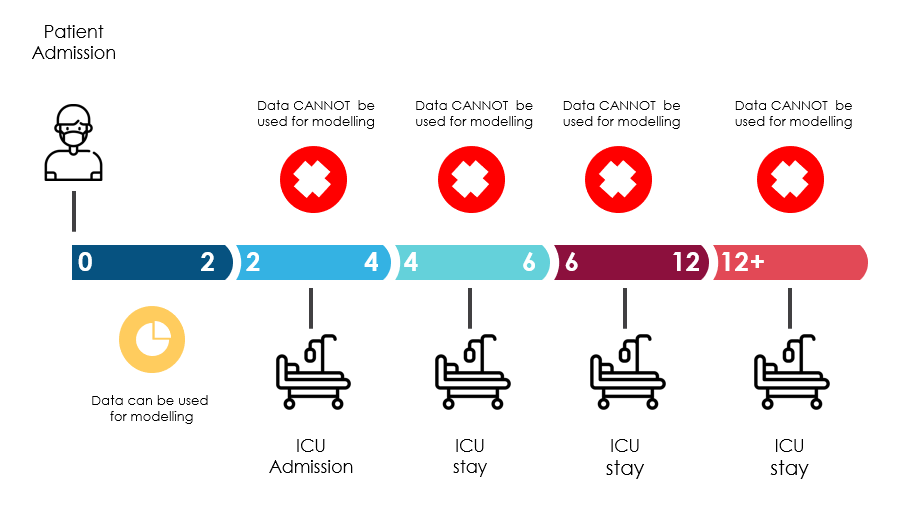

In [42]:
#Pegando o id dos pacientes que precisaram ser internado logo na primeira janela.
a_remover = dados_clinicos.query('WINDOW == "0-2" and ICU==1')['PATIENT_VISIT_IDENTIFIER'].values

#Filtrando a o dataset, removendo os id indesejados
dados_limpos = dados_clinicos.query('PATIENT_VISIT_IDENTIFIER not in @a_remover')

In [43]:
print(f'quantidade de pacientes removidos: {len(a_remover)}')
    
dados_limpos 

quantidade de pacientes removidos: 32


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


In [66]:
dados_limpos.iloc[:, 14:].std().sort_values(ascending=False)

LACTATE_MAX              0.901111
LACTATE_MEAN             0.901111
LACTATE_MEDIAN           0.901111
LACTATE_MIN              0.901111
RESPIRATORY_RATE_DIFF    0.466468
                           ...   
NEUTROPHILES_DIFF        0.000000
DIMER_DIFF               0.000000
LINFOCITOS_DIFF          0.000000
BILLIRUBIN_DIFF          0.000000
PC02_ARTERIAL_DIFF       0.000000
Length: 216, dtype: float64

Removido as linhas que não vamos utilizar, precisamos verificar como lidar com os dados nulos que estão em algumas linhas.  
Como vamos utilizar somente a primeira janela (0-2) para análise, só precisamos nos preocupar com os dados faltantes dessa linha, mas o desafio é o preenchimento desses valores.  
Vamos separar o os dados por pacientes e pegar o primeiro registro com a linha completa para preenchimento.

In [44]:
def verifica_uti(dados):
    """
    Verifica no dataset se o paciente foi internado na UTI e,
    Em caso positivo preenche a primeira janela com `ICU`=1,
    e retorna a somente a primeira janela.
    """
      
    if any(dados['ICU'] == 1):
        dados.loc[dados['WINDOW'] == '0-2', 'ICU'] = 1
        
    return dados.loc[dados['WINDOW'] == '0-2']


In [45]:
def cria_df_paciente(identificador):
    """
    Cria um subdataset com somente um paciente
    """
    
    quadro_paciente = dados_limpos.query(f'PATIENT_VISIT_IDENTIFIER == {identificador}')
    
    return quadro_paciente


In [46]:
def ajusta_dataset(dados : pd.DataFrame):
    """
    Pega o dataset e aplica as transformações necessárias para análise:
    é criado um subdataset para cada paciente e os dados nulos são
    preenchidos utilizando os dados do mesmo paciente, e depois retorna 
    um dataset com somente 1 registro por paciente    
    """
        
    lista_pacientes = dados['PATIENT_VISIT_IDENTIFIER'].unique()
    df_final = pd.DataFrame()
    
    for paciente in lista_pacientes:
        df = cria_df_paciente(paciente)
        df.fillna(method='bfill', inplace=True)
        linha = verifica_uti(df)       
        df_final = df_final.append(linha, ignore_index=True)
            
    return df_final
        

In [47]:
dados_ajustados = ajusta_dataset(dados_limpos)
dados_ajustados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
2,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
3,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
4,5,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,380,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
349,381,1,Above 90th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.619048,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,0-2,0
350,382,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
351,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0


In [48]:
#Verificando se os pacientes que removemos na etapa anterior não está no dataset
dados_ajustados['PATIENT_VISIT_IDENTIFIER'].unique() not in a_remover

True

#### Verificação Final  
Agora que realizamos os ajustes no dataset, vamos verificar se não existem mais dados nulos.

In [49]:
dados_ajustados.isnull().sum().sort_values(ascending=False)

P02_VENOUS_MIN              2
LEUKOCYTES_MAX              2
PC02_VENOUS_MEAN            2
PC02_VENOUS_MIN             2
PC02_VENOUS_MAX             2
                           ..
PATIENT_VISIT_IDENTIFIER    0
AGE_ABOVE65                 0
GENDER                      0
AGE_PERCENTIL               0
ICU                         0
Length: 231, dtype: int64

E parece que existem pelo menos mais duas linhas onde existem valores nulos.  
Como a nossa abordagem foi preencher os valores semelhantes por cada paciente, a existencia de nulos indica que existe pacientes que não realizou exames.

In [50]:
dados_ajustados[dados_ajustados['P02_VENOUS_MIN'].isna()]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
183,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0
262,287,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,1


Nesse caso, o paciente 199 não possui nenhum registro, enquanto o 287 não possui apenas algumas.  
Como se tratam de apenas duas linhas, vamos preencher essas lacunas, com valores medianas. Nesse caso a média não funcionaria pois, as colunas de grupo de doenças, apesar de estar com tipo float representa um valor booleano, e se aplicar a média perde-se o sentido dessas colunas. A moda pegará o valor central da amostra e para o nosso caso não distorcerá a distribuição dos dados.

In [52]:
dados_ajustados = dados_ajustados.groupby('ICU', as_index=False).apply(
                                                lambda x: x.fillna(x.median()))

dados_ajustados.reset_index(drop=True, inplace=True)

In [54]:
dados_ajustados.query('PATIENT_VISIT_IDENTIFIER in [199, 287]')

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
183,199,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0
262,287,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,1


Com os dados ajustamos, vamos verificar novamente a proporção de internados na UTI:

In [55]:
dados_ajustados['ICU'].value_counts(normalize=True)

0    0.538244
1    0.461756
Name: ICU, dtype: float64

Agora os dados parecem mais balanceados - na hora de treinar o modelo vai nos ajudar bastante.

#### Salvando os dados limpos  
Antes de salvar, vamos aplicar o ajuste nas colunas de doenças pre existentes.

In [56]:
colunas_doencas = dados_ajustados.iloc[:, 4:14].columns

dados_ajustados[colunas_doencas] = dados_ajustados[colunas_doencas].astype('int')

In [57]:
dados_ajustados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0,0,0,0,1,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,2,0,10th,0,0,0,0,0,0,0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
2,3,0,40th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
3,4,0,10th,0,0,0,0,0,0,0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
4,5,0,10th,0,0,0,0,0,0,0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0


In [58]:
dados_ajustados.to_csv('./dados/dados_ajustados.csv', index=False)